In this notebook, we will learn how to represent chemical structures as SMILES, how to use SMILES to create RDKit mol objects, and how to explore and visualize chemical data using pandas dataframes.

There are three well-known string conversions for small molecules, SMILES, InChI, and InChI Key. Here are the SMILES, InChI, and InChI Key strings for aspirin.

SMILES: CC(=O)OC1=CC=CC=C1C(=O)O

InChI: 1S/C9H8O4/c1-6(10)13-8-5-3-2-4-7(8)9(11)12/h2-5H,1H3,(H,11,12)

InChI Key: BSYNRYMUTXBXSQ-UHFFFAOYSA-N

In this workshop we will use SMILES strings. SMILES syntax is explained below.

There are Python libraries that are made for working just with chemical data. One commonly used library in Python for data science (or cheminformatics) is called RDKit. RDKit is an open-source cheminformatics library, primarily developed in C++ and has been under development since the year 2000. We will be using the Python interface to RDKit, though there are interfaces in other languages.

RDKit provides a molecule object that allows you to manipulate chemical structures. It has capabilities for reading and writing molecular file formats, calculating molecular properties, and performing substructure searches. In addition, it offers a wide range of cheminformatics algorithms such as molecular fingerprint generation, similarity metrics calculation, and molecular descriptor computation.

Most of this functionality is achieved through the RDKit `mol` object. In Python, we use the word "object" to refer to a variable type with associated data and methods. One example of an object we have seen in notebooks is a list - we could also call it a "list object". An object has `attributes` (data) and `methods`. You access information about objects with the syntax


object.data

where data is the attribute name. You access object methods with the syntax

object.method(arguments)

For example, for a list "`append` is a method that was covered in the introductory lesson.

my_list = []
my_list.append(1) # "append" is a method

In [2]:
from rdkit import Chem

## Creating Molecules with RDKit

Throughout this tutorial, it will be helpful to have access to the RDKit documentation.

To get information about molecules in RDKit, we have to first create objects representing molecules. RDKit has a molecule object that can be used to retrieve information or calculate properties. To create a molecule object, we have to communicate the molecule identity in a way that computers understand.

We will use SMILES strings to create our objects, though RDKit also has methods for creating molecules from the file formats listed in the previous notebook.

Creating molecules using SMILES
In the last lesson, we learned about molecular representations using SMILES strings. Now we will use SMILES strings to create molecule objects in RDKIT.

We can create a representation of methane using RDKit by using the MolFromSmiles function in rdkit.Chem.

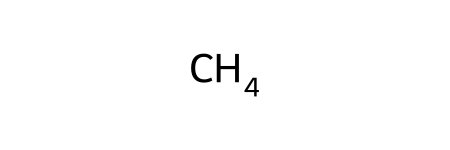

In [3]:
methane = Chem.MolFromSmiles("C")
methane

In [49]:
print(type(methane))
print(methane)

<class 'rdkit.Chem.rdchem.Mol'>


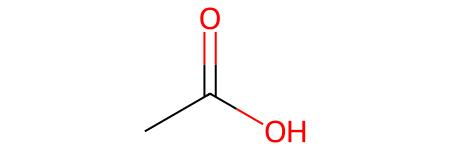

In [5]:
acetic_acid = Chem.MolFromSmiles('CC(=O)O')
acetic_acid

In [16]:
x = acetic_acid.GetNumHeavyAtoms()
print(x)

4


In [21]:
# help(acetic_acid)

In [22]:
y = acetic_acid.GetNumAtoms(onlyExplicit = False)
print(y)

8


## Loading a collection of small molecules
In the next few cells, we'll read a text file that lists the SMILES strings for some nonsteroidal antiinflammatory drugs (NSAIDS) and then use them to start building a pandas dataframe. The SMILES strings for the NSAIDS can be found in nsaids.txt.

In [23]:
from urllib.request import urlretrieve 

url = ("https://raw.githubusercontent.com/MolSSI-Education/iqb-2025/refs/heads/paul/data/nsaids.csv")

filename = "nsaids.csv"

urlretrieve(url, filename)

('nsaids.csv', <http.client.HTTPMessage at 0x11a682aa0>)

In [25]:
import pandas as pd

nsaids_file = "nsaids.csv"

nsaids_df = pd.read_csv(nsaids_file)

nsaids_df.head()

,Name,SMILES
0,Salicylic Acid,C1=CC=C(C(=C1)C(=O)O)O
1,Indomethacin,CC1=C(C2=C(N1C(=O)C3=CC=C(C=C3)Cl)C=CC(=C2)OC)...
2,Diclofenac,C1=CC=C(C(=C1)CC(=O)O)NC2=C(C=CC=C2Cl)Cl
3,Ibuprofen,CC(C)CC1=CC=C(C=C1)C(C)C(=O)O
4,Phenylbutazone,CCCCC1C(=O)N(N(C1=O)C2=CC=CC=C2)C3=CC=CC=C3


## The .apply method

The .apply method in pandas is used to apply a function along a row or column of a dataframe. This is useful when you have a custom function that you need to use on every value in a column, but there is not a NumPy or Pandas function for it.

We are going to use apply to add a new column to nsaid_df that contains the rdkit molecule for each of the NSAIDs.

In [26]:
nsaids_df["Molecule"] = nsaids_df["SMILES"].apply(Chem.MolFromSmiles)
nsaids_df.head()

,Name,SMILES,Molecule
0,Salicylic Acid,C1=CC=C(C(=C1)C(=O)O)O,<rdkit.Chem.rdchem.Mol object at 0x138ddfd10>
1,Indomethacin,CC1=C(C2=C(N1C(=O)C3=CC=C(C=C3)Cl)C=CC(=C2)OC)...,<rdkit.Chem.rdchem.Mol object at 0x138ddf920>
2,Diclofenac,C1=CC=C(C(=C1)CC(=O)O)NC2=C(C=CC=C2Cl)Cl,<rdkit.Chem.rdchem.Mol object at 0x138ddf840>
3,Ibuprofen,CC(C)CC1=CC=C(C=C1)C(C)C(=O)O,<rdkit.Chem.rdchem.Mol object at 0x138ddfdf0>
4,Phenylbutazone,CCCCC1C(=O)N(N(C1=O)C2=CC=CC=C2)C3=CC=CC=C3,<rdkit.Chem.rdchem.Mol object at 0x138ddfb50>


At this point, nsaid_df contains two columns: the SMILES string and the molecule. We will go one step further and use apply to add another column to the dataframe that contains a descriptor based on the rdkit molecule. Before we can do that we need to import a new sublibrary from rdkit.Chem called Descriptors. Notice that the new columns will be based on the Molecule column, which contains rdkit mol objects.

In [50]:
from rdkit.Chem import Descriptors
from rdkit.Chem import Lipinski

nsaids_df["Mol Wt"] = nsaids_df["Molecule"].apply(Descriptors.MolWt)
nsaids_df["logP"] = nsaids_df["Molecule"].apply(Descriptors.MolLogP)
nsaids_df["HBD"] = nsaids_df["Molecule"].apply(Lipinski.NHOHCount)            # Number of hydrogen bond donors
nsaids_df["HBA"] = nsaids_df["Molecule"].apply(Lipinski.NOCount)
nsaids_df.head()

,Name,SMILES,Molecule,Mol Wt,logP,HBD,HBA
0,Salicylic Acid,C1=CC=C(C(=C1)C(=O)O)O,<rdkit.Chem.rdchem.Mol object at 0x138ddfd10>,138.122,1.09040,2,3
1,Indomethacin,CC1=C(C2=C(N1C(=O)C3=CC=C(C=C3)Cl)C=CC(=C2)OC)...,<rdkit.Chem.rdchem.Mol object at 0x138ddf920>,357.793,3.92732,1,5
2,Diclofenac,C1=CC=C(C(=C1)CC(=O)O)NC2=C(C=CC=C2Cl)Cl,<rdkit.Chem.rdchem.Mol object at 0x138ddf840>,296.153,4.36410,2,3
3,Ibuprofen,CC(C)CC1=CC=C(C=C1)C(C)C(=O)O,<rdkit.Chem.rdchem.Mol object at 0x138ddfdf0>,206.285,3.07320,1,2
4,Phenylbutazone,CCCCC1C(=O)N(N(C1=O)C2=CC=CC=C2)C3=CC=CC=C3,<rdkit.Chem.rdchem.Mol object at 0x138ddfb50>,308.381,3.78780,0,4


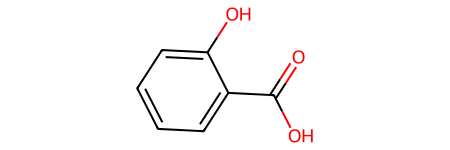

In [51]:
salicylic_acid = nsaids_df["Molecule"][0]
salicylic_acid

In [53]:
nsaids_df.shape

(22, 7)

Matplotlib is building the font cache; this may take a moment.


array([[<Axes: title={'center': 'Mol Wt'}>,
        <Axes: title={'center': 'logP'}>],
       [<Axes: title={'center': 'HBD'}>, <Axes: title={'center': 'HBA'}>]],
      dtype=object)

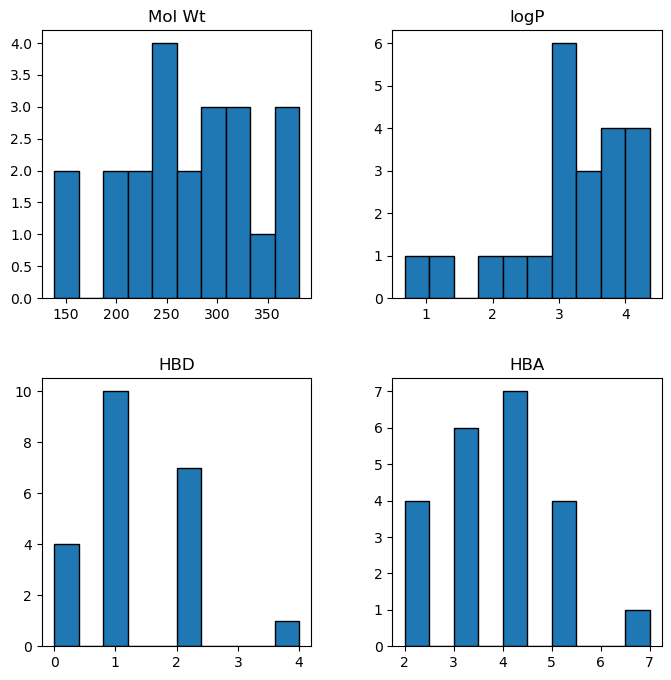

In [52]:
nsaids_df.hist(figsize=(8,8), edgecolor = 'black', grid = False)

<Axes: xlabel='Name'>

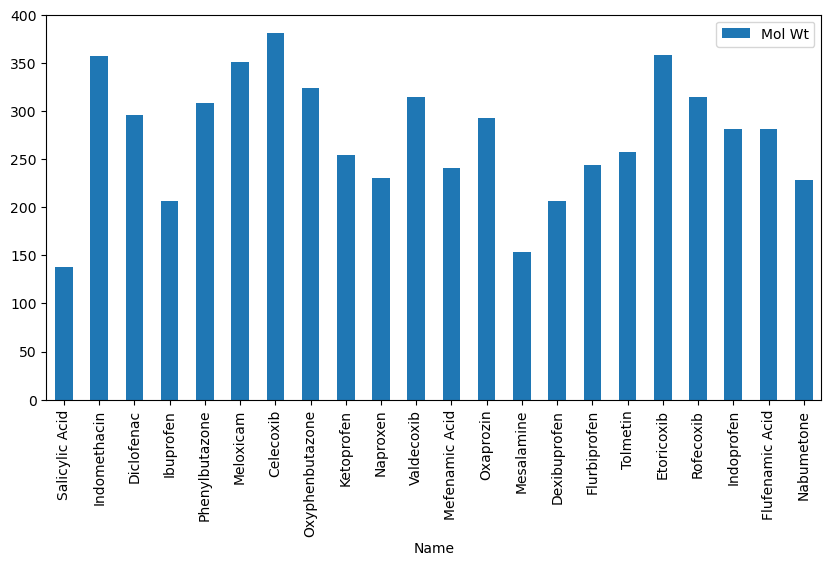

In [54]:
nsaids_df.plot.bar(x = 'Name', y = 'Mol Wt', figsize = (10,5))

In this notebook we will use the BindingDB, database of chemical structures and biological activity values extracted from the chemical literature, to search for compounds that bind to the SARS-CoV-2 main protease. In addition to hosting data from the scientifiic literature, BindingDB also has data extracted from chemical patents. We will extract the data from a SARS-CoV-2 inhibitor patent, explore this data, and save a representative subset for a subsequent docking analysis.

In [1]:
import pandas as pd
import mols2grid
import seaborn as sns
import numpy as np
from rdkit import Chem
from rdkit.Chem import rdFMCS
from rdkit.Chem.Scaffolds.MurckoScaffold import GetScaffoldForMol
import useful_rdkit_utils as uru
from IPython.core.display import HTML

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/PatWalters/practical_cheminformatics_tutorials/refs/heads/main/pdb/monomers_12285.tsv",sep="\t")

In [3]:
df.head()

,BindingDB Reactant_set_id,Ligand SMILES,Ligand InChI,Ligand InChI Key,BindingDB MonomerID,BindingDB Ligand Name,Target Name,Target Source Organism According to Curator or DataSource,Ki (nM),IC50 (nM),...,UniProt (SwissProt) Recommended Name of Target Chain,UniProt (SwissProt) Entry Name of Target Chain,UniProt (SwissProt) Primary ID of Target Chain,UniProt (SwissProt) Secondary ID(s) of Target Chain,UniProt (SwissProt) Alternative ID(s) of Target Chain,UniProt (TrEMBL) Submitted Name of Target Chain,UniProt (TrEMBL) Entry Name of Target Chain,UniProt (TrEMBL) Primary ID of Target Chain,UniProt (TrEMBL) Secondary ID(s) of Target Chain,UniProt (TrEMBL) Alternative ID(s) of Target Chain
0,1442352,Clc1cccc(CN(C(=O)Cc2nnc3ccccn23)c2ccc(cc2)-c2c...,InChI=1S/C24H19ClN6O/c25-20-5-3-4-17(12-20)16-...,YQAKCKVVPJDXAF-UHFFFAOYSA-N,694369,"US20240293380, Compound 1",Replicase polyprotein 1ab,Severe acute respiratory syndrome coronavirus 2,NaN,365.0,...,Replicase polyprotein 1ab,R1AB_SARS2,P0DTD1,NaN,NaN,ORF1ab polyprotein ORF1ab polyprotein ORF1ab ...,A0A6V7ALW7_SARS2 A0A679G4D8_SARS2 N/A A0A6B9V0...,A0A6V7ALW7 A0A679G4D8 A0A6B9VP19 A0A6B9V049,A0A6C0M7K8,NaN
1,1442353,Clc1cccc(CN(C(=O)Cc2cncc3ccccc23)c2ccc(cc2)-c2...,InChI=1S/C27H21ClN4O/c28-24-6-3-4-19(12-24)18-...,XJXWAMOXLIGLOK-UHFFFAOYSA-N,694371,"US20240293380, Compound 2",Replicase polyprotein 1ab,Severe acute respiratory syndrome coronavirus 2,NaN,30.0,...,Replicase polyprotein 1ab,R1AB_SARS2,P0DTD1,NaN,NaN,ORF1ab polyprotein ORF1ab polyprotein ORF1ab ...,A0A6V7ALW7_SARS2 A0A679G4D8_SARS2 N/A A0A6B9V0...,A0A6V7ALW7 A0A679G4D8 A0A6B9VP19 A0A6B9V049,A0A6C0M7K8,NaN
2,1442354,Fc1ccc2nnc(CC(=O)N(Cc3cccc(Cl)c3)c3ccc(cc3)-c3...,InChI=1S/C24H18ClFN6O/c25-19-3-1-2-16(10-19)14...,OWZVYFBZPRFXIM-UHFFFAOYSA-N,694372,"US20240293380, Compound 3",Replicase polyprotein 1ab,Severe acute respiratory syndrome coronavirus 2,NaN,3365.0,...,Replicase polyprotein 1ab,R1AB_SARS2,P0DTD1,NaN,NaN,ORF1ab polyprotein ORF1ab polyprotein ORF1ab ...,A0A6V7ALW7_SARS2 A0A679G4D8_SARS2 N/A A0A6B9V0...,A0A6V7ALW7 A0A679G4D8 A0A6B9VP19 A0A6B9V049,A0A6C0M7K8,NaN
3,1442355,Clc1cccc(CN(C(=O)Cc2cnc3ccccn23)c2ccc(cc2)-c2c...,InChI=1S/C25H20ClN5O/c26-21-5-3-4-18(12-21)17-...,ISMCHMDTFJNEJC-UHFFFAOYSA-N,694373,"US20240293380, Compound 4",Replicase polyprotein 1ab,Severe acute respiratory syndrome coronavirus 2,NaN,1146.0,...,Replicase polyprotein 1ab,R1AB_SARS2,P0DTD1,NaN,NaN,ORF1ab polyprotein ORF1ab polyprotein ORF1ab ...,A0A6V7ALW7_SARS2 A0A679G4D8_SARS2 N/A A0A6B9V0...,A0A6V7ALW7 A0A679G4D8 A0A6B9VP19 A0A6B9V049,A0A6C0M7K8,NaN
4,1442356,Clc1cccc(CN(C(=O)Cc2cnccn2)c2ccc(cc2)-c2cn[nH]...,InChI=1S/C22H18ClN5O/c23-19-3-1-2-16(10-19)15-...,ZGRFZXXCTIRFCB-UHFFFAOYSA-N,694374,"US20240293380, Compound 5",Replicase polyprotein 1ab,Severe acute respiratory syndrome coronavirus 2,NaN,5217.0,...,Replicase polyprotein 1ab,R1AB_SARS2,P0DTD1,NaN,NaN,ORF1ab polyprotein ORF1ab polyprotein ORF1ab ...,A0A6V7ALW7_SARS2 A0A679G4D8_SARS2 N/A A0A6B9V0...,A0A6V7ALW7 A0A679G4D8 A0A6B9VP19 A0A6B9V049,A0A6C0M7K8,NaN


In [4]:
df.shape

(75, 50)

In [5]:
df.rename(columns={"Ligand SMILES": "SMILES"}, inplace = True)
df.rename(columns={"BindingDB Ligand Name": "Name"}, inplace = True)

We can aslo see that the data has 75 rows, with each compound corresponding to a row. For our purposes, we'll focus on a few fields.

* SMILES - the chemical structure of the compound
* Name - the internal identifier Binding DB provides for each compund
* IC50 (nM) - the IC50 in nM.

The IC50, or half maximal inhibitory concentration, is a measure of a substance's potency in inhibiting a specific biological or biochemical function. It represents the concentration of an inhibitor needed to reduce a particular biological process or component by 50% in vitro, and is commonly used to assess the effectiveness of drugs in pharmacological research. IC50 values are typically expressed as nM concentrations and provide a quantitative indication of how much of an inhibitory substance is required to achieve half-maximal inhibition of a given target or process

We can use mols2grid to browse the chemcial structures of the 75 compounds.

In [6]:
mols2grid.display(df, smiles_col = "SMILES", subset = ["img", "IC50 (nM)"])

In [7]:
my_df = df[["Name", "SMILES", "IC50 (nM)"]]
my_df_sorted = my_df.sort_values(by = "IC50 (nM)")
my_df_sorted.head()

,Name,SMILES,IC50 (nM)
9,"US20240293380, Compound 12",Fc1cc(Cl)cc(CN(C(=O)Cc2cncc3ccccc23)c2ccc(cc2)...,15.0
1,"US20240293380, Compound 2",Clc1cccc(CN(C(=O)Cc2cncc3ccccc23)c2ccc(cc2)-c2...,30.0
24,"US20240293380, Compound 29",Fc1cc(Cl)cc(CN(C(=O)Cc2cncc3ccccc23)c2ccc(cn2)...,40.0
23,"US20240293380, Compound 28",Fc1cc(F)cc(CN(C(=O)Cc2cncc3ccccc23)c2ccc(cc2)-...,53.0
31,"US20240293380, Compound 40",Fc1cncc(CN(C(=O)Cc2cncc3ccccc23)c2ccc(cc2)-c2c...,53.0


In [8]:
sns.set(rc={'figure.figsize': (5,5 )})
sns.set_style('whitegrid')
sns.set_context('notebook')

Let's look at the the IC50 distribution for the 75 compounds. As we can see below, the default view isn't very helpful.

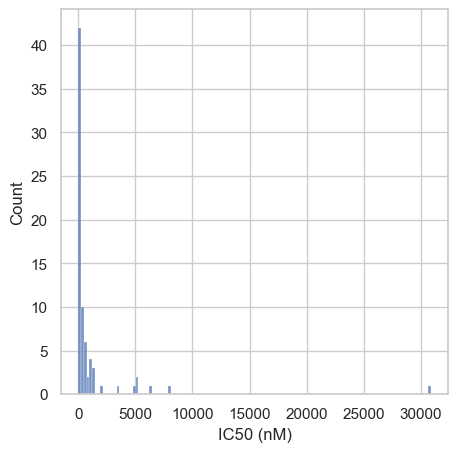

In [9]:
ax = sns.histplot(my_df_sorted["IC50 (nM)"])

It's oftent easier to look at the distribution of pIC50 values, where pIC50 is the negative log of the IC50.

In [10]:
df["pIC50"] = -np.log10(my_df_sorted["IC50 (nM)"] * 1e-9)

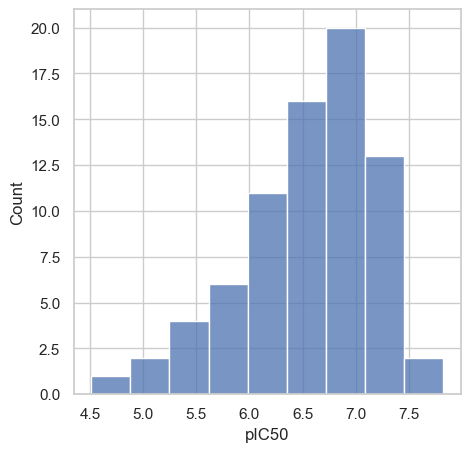

In [11]:
ax = sns.histplot(df.pIC50)

In [12]:
max_pIC50 = max(df.pIC50)
min_pIC50 = min(df.pIC50)
mean_pIC50 = np.mean(df.pIC50)
print(f"{max_pIC50 = }, {min_pIC50 = }, {mean_pIC50 = }")

max_pIC50 = 7.823908740944319, min_pIC50 = 4.510885630621081, mean_pIC50 = np.float64(6.5473981997284225)


For visualization it's often helpful to bin the activity into high, medium, and low bins. Here well put compounds with 6 < pIC50 < 7 (0.1-1 \micro M) into the "medium" bin, and compounds with pIC50 > 7 into the "high" bin.

In [13]:
df["activity"] = pd.cut(df.pIC50, bins = [0,6,7,100], labels = ["low", "med", "high"], right = False)
df["activity"][0:5]

0     med
1    high
2     low
3     low
4     low
Name: activity, dtype: category
Categories (3, object): ['low' < 'med' < 'high']

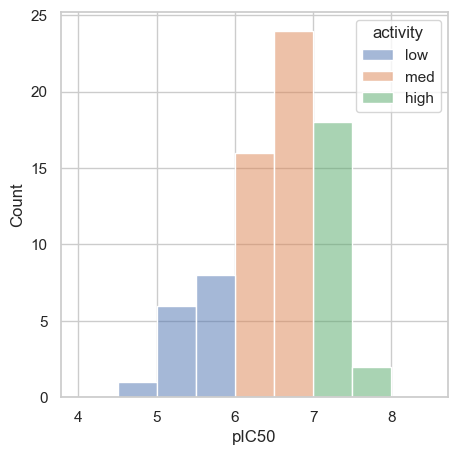

In [14]:
ax = sns.histplot(x = "pIC50", hue = "activity", data = df, bins = np.arange(4, 9, 0.5))

Now that we have the IC50 data binned into high, med, low, we can use these categories to make plots showing mulitple parameters. In the cells below we'll make a scatterplot of molecular weight (MW) vs LogP, a measure of lipophilicity. We can then color the plot by activty and see whether acitivity is driven by MW or LogP.

To calculate MW and LogP we need to add an RDKit molecule column to the dataframe. As we will see in next couple of cells, the Pandas apply method provides a handy way of performing operations on an entire dataframe column.

In [15]:
df["mol"] = df.SMILES.apply(Chem.MolFromSmiles)

In [16]:
from rdkit.Chem import Descriptors

df["MW"] = df.mol.apply(Descriptors.MolWt)
df["LogP"] = df.mol.apply(Descriptors.MolLogP)

Use seaborn to make the scatterplot of MW vs LogP, colored by activity. Note that while we don't have a clear relationship between either MW or LogP and activity, the smallest molecules tend to have low to medium activity.

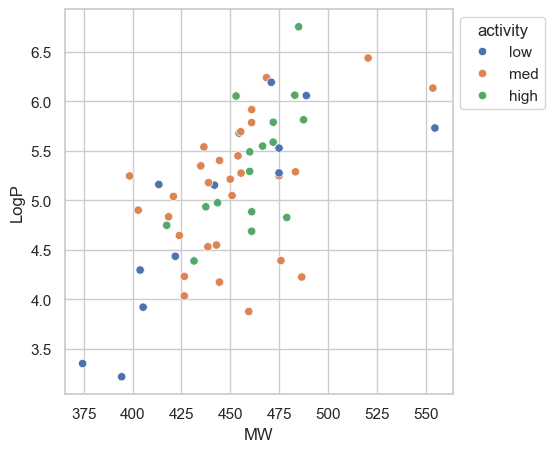

In [17]:
ax = sns.scatterplot(x = "MW", y = "LogP", hue = "activity", data = df)
sns.move_legend(ax, "upper left", bbox_to_anchor = (1,1))

In [18]:
from rdkit.Chem import Lipinski

df['HBD'] = df["mol"].apply(Lipinski.NHOHCount)
df["HBA"] = df["mol"].apply(Lipinski.NOCount)

(75,)


<Axes: xlabel='HBA', ylabel='Count'>

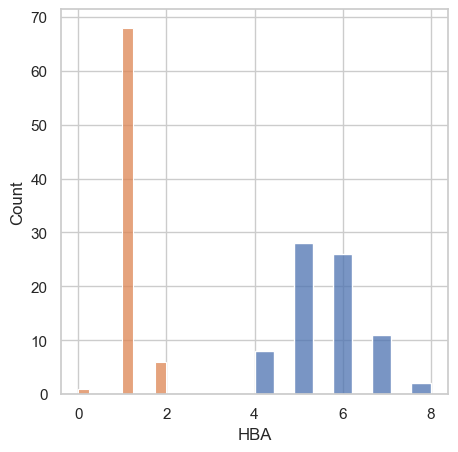

In [19]:
print(df["HBA"].shape)
sns.histplot(df["HBA"])
sns.histplot(df["HBD"])

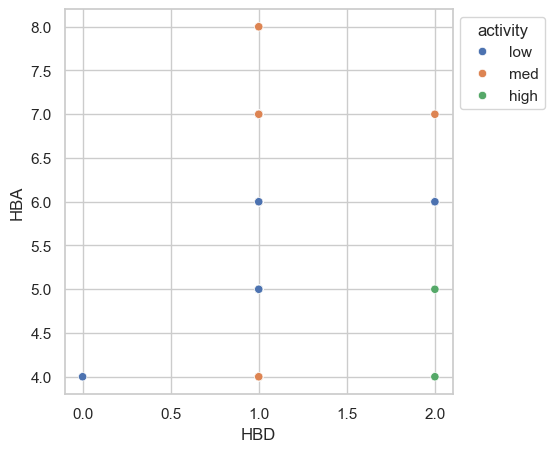

In [20]:
ax = sns.scatterplot(x = "HBD", y = "HBA", hue = "activity", data = df)
sns.move_legend(ax, "upper left", bbox_to_anchor = (1,1))

## Understanding the Chemistry in the Downloaded Molecules

We downloaded 75 molecules from BindingDB. It can often be challenging to understand the trends in sets of molecules. In the next section, we'll look at how Cheminformatics tools can aid or exploratory data analysis. As a first step in this analysis, we will see which parts are common to all 75 of the molecules. To do this, we can use the Maxiumum Common Substructure (MCS) capability in the RDKit. To use this capability, we must first convert the SMILES in our dataframe to RDKit molecule objects. As above, we can use the Pandas apply method to do this.

In [21]:
mcs = rdFMCS.FindMCS(df.mol)

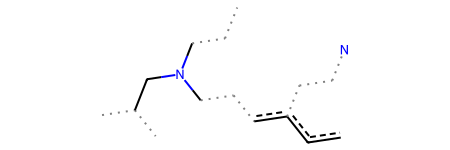

In [24]:
arj = Chem.MolFromSmarts(mcs.smartsString)
arj

The visualization above can be difficult to interpret. The MCS tends to make more sense when we map it onto the molecules. Here we can map the MCS on to the first molecule in the dataframe and display it as a red highlight.

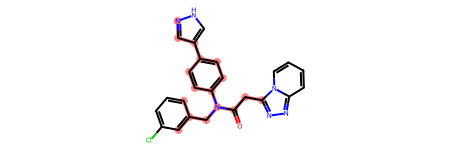

In [30]:
df.mol.values[0].GetSubstructMatch(arj)
df.mol.values[0]

Another tool for exploring chemical datasets is the Bemis-Murcko scaffold. In this technique a molecule is reduced to a set of connected rings and linkers. We can use the GetScaffoldForMol method from the RDKit to generate Bemis-Murcko scaffolds.

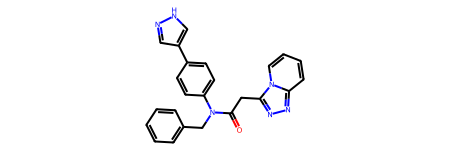

In [31]:
df["Scaffold"] = df["mol"].apply(GetScaffoldForMol)
df["Scaffold"][0]

In [32]:
df["Scaffold_SMILES"] = df["Scaffold"].apply(Chem.MolToSmiles)
df["Scaffold_SMILES"][0]

'O=C(Cc1nnc2ccccn12)N(Cc1ccccc1)c1ccc(-c2cn[nH]c2)cc1'

In [47]:
scaffold_counts_df = df["Scaffold_SMILES"].value_counts()
print(scaffold_counts_df.head())
scaffold_counts_df.shape

Scaffold_SMILES
O=C(Cc1cncc2ccccc12)N(Cc1ccccc1)c1ccc(-c2c[nH]cn2)cc1    16
O=C(Cc1cccnc1)N(Cc1ccccc1)c1ccc(-c2c[nH]cn2)cc1          10
O=C(Cc1nnc2ccccn12)N(Cc1ccccc1)c1ccc(-c2c[nH]cn2)cc1      7
O=C(Cc1cncc2ccccc12)N(Cc1ccccc1)c1ccc(C2=CCNC2)cc1        3
O=C(Cc1cncc2ccccc12)N(Cc1ccccc1)c1ccccc1                  3
Name: count, dtype: int64


(34,)